<a href="https://colab.research.google.com/github/nitinpatil301a/Tensorflow-Keras-Work/blob/master/Boston_Dataset_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.0.0
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
from sklearn.datasets import load_boston
boston = load_boston()


In [3]:
X=pd.DataFrame(boston.data,columns=boston.feature_names  )
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y=pd.DataFrame(boston.target,columns=["target"])
y.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [0]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
X=pd.DataFrame(MM.fit_transform(X),columns=X.columns)

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2)
x_train.shape,y_train.shape

((404, 13), (404, 1))

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [0]:
model= Sequential()
model.add(Dense(13, activation = 'relu',kernel_initializer="uniform"))
model.add(Dense(10, activation = 'relu',kernel_initializer="uniform"))
model.add(Dropout(0.1))
model.add(Dense(10, activation = 'relu',kernel_initializer="uniform"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'linear',kernel_initializer="uniform"))

In [0]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=['mse'])

In [23]:
history=model.fit(x_train,y_train,batch_size=10,epochs=100,validation_split=0.1)

Train on 363 samples, validate on 41 samples
Epoch 1/100
363/363 [==============================] - 1s 2ms/sample - loss: 606.1553 - mse: 606.1553 - val_loss: 527.0536 - val_mse: 527.0537
Epoch 2/100
363/363 [==============================] - 0s 242us/sample - loss: 601.5107 - mse: 601.5107 - val_loss: 517.6974 - val_mse: 517.6974
Epoch 3/100
363/363 [==============================] - 0s 226us/sample - loss: 574.2372 - mse: 574.2372 - val_loss: 462.3603 - val_mse: 462.3603
Epoch 4/100
363/363 [==============================] - 0s 224us/sample - loss: 460.5604 - mse: 460.5604 - val_loss: 288.5727 - val_mse: 288.5726
Epoch 5/100
363/363 [==============================] - 0s 211us/sample - loss: 245.9863 - mse: 245.9863 - val_loss: 108.5555 - val_mse: 108.5555
Epoch 6/100
363/363 [==============================] - 0s 222us/sample - loss: 152.2464 - mse: 152.2464 - val_loss: 88.5866 - val_mse: 88.5866
Epoch 7/100
363/363 [==============================] - 0s 233us/sample - loss: 163.9024 -

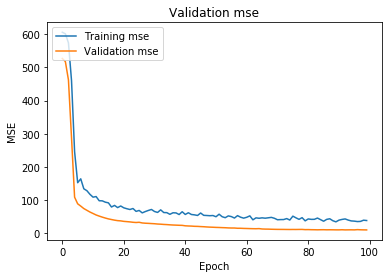

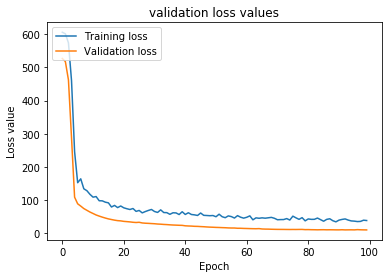

In [24]:
plt.plot(history.history['mse'], label='Training mse')
plt.plot(history.history['val_mse'], label='Validation mse')
plt.title('Validation mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [25]:
ypred=model.predict(x_test)
score=model.evaluate(x_test,y_test)
score

102/102 [==============================] - 0s 89us/sample - loss: 20.6169 - mse: 20.6169


[20.616949287115357, 20.61695]